In [2]:
# Compare average monthly time series of CESM to USGS gage data
# Also calculate min and max values for comparison between datasets
# Here CESM data have already had the monthly time series extracted from netcdfs and saved as a timeseries in a .txt file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import re
from datetime import datetime
from matplotlib.gridspec import GridSpec
import math

In [3]:
# specify the directories that the two datasets to be compared are saved in.
dir= '/Volumes/MCO_SSD/data/CESM/timeseries_from_netcdf/QCHANR_gagegridcellequivalent/*.txt'
dir3 = '/Volumes/MCO_SSD/data/ObservedData/USGS/daily/header_removed/*.txt'

In [4]:
# Get list of all files for the two categories of datasets. Save each of these as a list to be used below
dir_list = glob(dir, recursive=True)
print(dir_list)
dir_list3 = glob(dir3, recursive=True)
print(dir_list3)

['/Volumes/MCO_SSD/data/CESM/timeseries_from_netcdf/QCHANR_gagegridcellequivalent/timeseries_8502005_Ohio_Louisville_ensmean.txt', '/Volumes/MCO_SSD/data/CESM/timeseries_from_netcdf/QCHANR_gagegridcellequivalent/timeseries_8502005_LowerMississippi_Vicksburg_ensmean.txt', '/Volumes/MCO_SSD/data/CESM/timeseries_from_netcdf/QCHANR_gagegridcellequivalent/timeseries_8502005_UpperMississippi_StLouis_ensmean.txt', '/Volumes/MCO_SSD/data/CESM/timeseries_from_netcdf/QCHANR_gagegridcellequivalent/timeseries_8502005_Missouri_Hermann_ensmean.txt', '/Volumes/MCO_SSD/data/CESM/timeseries_from_netcdf/QCHANR_gagegridcellequivalent/timeseries_8502005_Arkansas_LittleRock_ensmean.txt']
['/Volumes/MCO_SSD/data/ObservedData/USGS/daily/header_removed/USGS_AR_LittleRock_daily_19271970.txt', '/Volumes/MCO_SSD/data/ObservedData/USGS/daily/header_removed/USGS_MO_Hermann_daily_19282021.txt', '/Volumes/MCO_SSD/data/ObservedData/USGS/daily/header_removed/USGS_MS_at_Vicksburg_daily_20082021.txt', '/Volumes/MCO_SSD/

In [5]:
df_test = pd.read_csv('/Volumes/MCO_SSD/data/ObservedData/USGS/daily/header_removed/USGS_MO_Hermann_daily_19282021.txt', sep="\t")
df_test['QCHANR'] = df_test['QCHANR']*0.028316847
print(df_test)

      agency_cd  site_no datetime  GAGEHEIGHT 75910_00065_30800_cd  \
0          USGS  6934500  10/1/28         NaN                  NaN   
1          USGS  6934500  10/2/28         NaN                  NaN   
2          USGS  6934500  10/3/28         NaN                  NaN   
3          USGS  6934500  10/4/28         NaN                  NaN   
4          USGS  6934500  10/5/28         NaN                  NaN   
...         ...      ...      ...         ...                  ...   
33719      USGS  6934500  1/25/21        5.34                    P   
33720      USGS  6934500  1/26/21        8.66                    P   
33721      USGS  6934500  1/27/21       10.22                    P   
33722      USGS  6934500  1/28/21       10.55                    P   
33723      USGS  6934500  1/29/21       10.99                    P   

            QCHANR 75911_00060_00003_cd  
0      1305.406647                    A  
1      1228.951160                    A  
2      1090.198609               

In [6]:
#Specify basin names to be used

#subbasin_list= ['Arkansas.White.Red.Region','Lower.Mississippi.Region', 'Missouri.Region','Ohio.Region','Tennessee.Region','Upper.Mississippi.Region']
#subbasin_list= ['Eastern.Mississippi.Basin.Region', 'Western.Mississippi.Basin.Region']
subbasin_list= ['LittleRock','Hermann','Vicksburg','StLouis', 'Louisville']
#subbasin_list= ['Hermann']
#subbasin_list= ['StLouis']
#subbasins_list_1 = ['LittleRock','Vicksburg','Louisville']
#subbasins_list_2 = ['Hermann', 'StLouis']


In [7]:
# Check files

for basin in subbasin_list:
    print(basin)
    filtered_dir_list = [x for x in dir_list if basin in x] 
    #print(filtered_dir_list)
    #filtered_dir_list_2 = [y for y in dir_list2 if basin in y] 
    #print(filtered_dir_list_2)
    filtered_dir_list_3 = [z for z in dir_list3 if basin in z]
    #print(filtered_dir_list_3)
    final_filtered_dir_list = filtered_dir_list + filtered_dir_list_3 #+ filtered_dir_list_2
    print(final_filtered_dir_list)
    

LittleRock
['/Volumes/MCO_SSD/data/CESM/timeseries_from_netcdf/QCHANR_gagegridcellequivalent/timeseries_8502005_Arkansas_LittleRock_ensmean.txt', '/Volumes/MCO_SSD/data/ObservedData/USGS/daily/header_removed/USGS_AR_LittleRock_daily_19271970.txt']
Hermann
['/Volumes/MCO_SSD/data/CESM/timeseries_from_netcdf/QCHANR_gagegridcellequivalent/timeseries_8502005_Missouri_Hermann_ensmean.txt', '/Volumes/MCO_SSD/data/ObservedData/USGS/daily/header_removed/USGS_MO_Hermann_daily_19282021.txt']
Vicksburg
['/Volumes/MCO_SSD/data/CESM/timeseries_from_netcdf/QCHANR_gagegridcellequivalent/timeseries_8502005_LowerMississippi_Vicksburg_ensmean.txt', '/Volumes/MCO_SSD/data/ObservedData/USGS/daily/header_removed/USGS_MS_at_Vicksburg_daily_20082021.txt']
StLouis
['/Volumes/MCO_SSD/data/CESM/timeseries_from_netcdf/QCHANR_gagegridcellequivalent/timeseries_8502005_UpperMississippi_StLouis_ensmean.txt', '/Volumes/MCO_SSD/data/ObservedData/USGS/daily/header_removed/USGS_MS_StLouis_daily_18612021.txt']
Louisville

In [8]:
#Create dataframe to store the mean values for each subbasin, for plotting

# df_plot = pd.DataFrame()
figures = []

# #create dataframe to store the values for each subbasin, for plotting
df_plot = pd.DataFrame()

for basin in subbasin_list:

    print(basin)
    filtered_dir_list = [x for x in dir_list if basin in x]
    #filtered_dir_list_2 = [y for y in dir_list2 if basin in y] 
    filtered_dir_list_3 = [z for z in dir_list3 if basin in z]
    final_filtered_dir_list = filtered_dir_list + filtered_dir_list_3 #+ filtered_dir_list_2
    #print(final_filtered_dir_list)
    
    for (directory1,directory3) in zip(filtered_dir_list,filtered_dir_list_3):
        name1 = os.path.basename(directory1)
        name3 = os.path.basename(directory3)
    
        # setup dataframe1  ## this could be updated to add any other datasets that will be plotted on the same y axis
        df = pd.read_csv(directory1, sep=" ")
        #print(df)
        df['date'] = pd.to_datetime(df['date'])
        df['month'] = pd.DatetimeIndex(df['date']).month
        df = df[['date','month','QCHANR']]
        df = df.set_index('date')
        df.insert(2,'dir_name',name1)
        df.insert(3,'dataset_name','CESM LME')
        df.insert(4,'basin',basin)

        # setup dataframe3
        df_2 = pd.read_csv(directory3, sep="\t")
        #print(df_2)
        df_2['datetime'] = pd.to_datetime(df_2['datetime'])
        df_2['month'] = pd.DatetimeIndex(df_2['datetime']).month
        df_2.rename(columns={'datetime':'date'}, inplace=True)
        df_2 = df_2[['date','month','QCHANR']]
        df_2 = df_2.set_index('date')
        df_2['QCHANR'] = df_2['QCHANR']*0.028316847 # USGS units are cfs, so multiply by 0.028316847 to convert to m3/s 
        df_2.insert(2,'dir_name',name1)
        df_2.insert(3,'dataset_name','USGS')
        df_2.insert(4,'basin',basin)
      
    # append the dataset of monthly means to the master df for plotting
    df_plot = df_plot.append(df, ignore_index = True)
    df_plot = df_plot.append(df_2, ignore_index = True)
    
    print(df_plot)
        

LittleRock
       month       QCHANR                                           dir_name  \
0          2   986.647095  timeseries_8502005_Arkansas_LittleRock_ensmean...   
1          3  1291.352783  timeseries_8502005_Arkansas_LittleRock_ensmean...   
2          4  1767.194458  timeseries_8502005_Arkansas_LittleRock_ensmean...   
3          5  2411.183105  timeseries_8502005_Arkansas_LittleRock_ensmean...   
4          6  2899.211914  timeseries_8502005_Arkansas_LittleRock_ensmean...   
...      ...          ...                                                ...   
17572      9   934.455951  timeseries_8502005_Arkansas_LittleRock_ensmean...   
17573      9   886.317311  timeseries_8502005_Arkansas_LittleRock_ensmean...   
17574      9   775.881608  timeseries_8502005_Arkansas_LittleRock_ensmean...   
17575      9  1064.713447  timeseries_8502005_Arkansas_LittleRock_ensmean...   
17576      9   858.000464  timeseries_8502005_Arkansas_LittleRock_ensmean...   

      dataset_name       bas

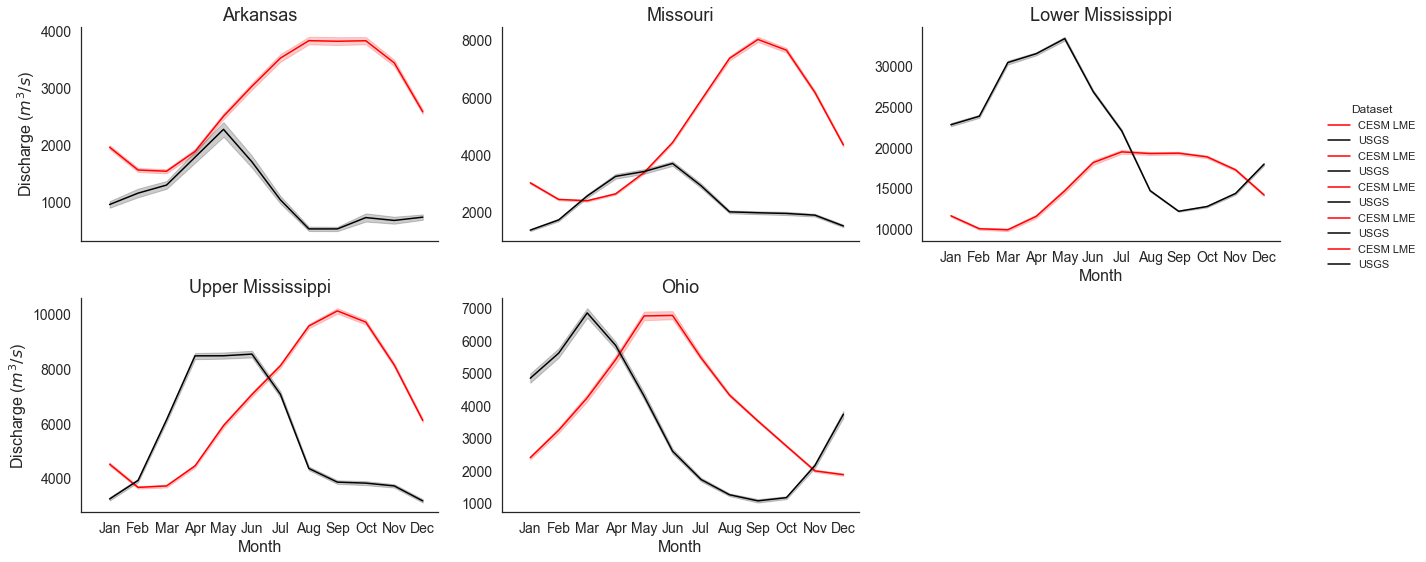

In [9]:
# Plot the monthly USGS and CESM data by basin
# Define a custom color palette
my_palette = {"CESM LME": "red", "USGS": "black"}
titles = ["Arkansas","Missouri","Lower Mississippi","Upper Mississippi","Ohio"]
sns.set(style='white', rc={'axes.labelsize': 16, 'axes.titlesize': 18, 'font.size': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14})

g = sns.FacetGrid(df_plot, col="basin", hue="dataset_name", sharey=False, palette=my_palette, height=4, aspect=1.5, col_wrap=3)
g.map(sns.lineplot, "month", "QCHANR")
g.set_axis_labels("Month", "Discharge ($m^3/s$)")
g.set_titles("{col_name}")  # use this argument literally
g.set(xticks=np.arange(0,13,1))
#g.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
g.set_xticklabels(["","Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
#g.add_legend(title="Dataset", loc="center right")
legend = g.fig.legend(title="Dataset", loc="right")
legend.set_bbox_to_anchor((1.1, 0.65))
legend.get_frame().set_visible(False)
for ax,title in zip(g.axes.flatten(),titles):
    ax.set_title(title)
    
plt.savefig(f'/Volumes/MCO_SSD/data/plots/validation_paper/usgs_v_cesm.png', dpi=300, bbox_inches='tight')

In [11]:
# Then look at full df
df_plot

,month,QCHANR,dir_name,dataset_name,basin
0,2,986.647095,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
1,3,1291.352783,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
2,4,1767.194458,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
3,5,2411.183105,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
4,6,2899.211914,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
...,...,...,...,...,...
261275,1,1860.416848,timeseries_8502005_Ohio_Louisville_ensmean.txt,USGS,Louisville
261276,1,NaN,timeseries_8502005_Ohio_Louisville_ensmean.txt,USGS,Louisville
261277,1,NaN,timeseries_8502005_Ohio_Louisville_ensmean.txt,USGS,Louisville
261278,1,NaN,timeseries_8502005_Ohio_Louisville_ensmean.txt,USGS,Louisville


In [12]:
# Drop any NA values, since USGS sometimes has missing values
df_plot_filtered = df_plot.dropna(subset=['QCHANR'])
df_plot_filtered

,month,QCHANR,dir_name,dataset_name,basin
0,2,986.647095,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
1,3,1291.352783,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
2,4,1767.194458,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
3,5,2411.183105,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
4,6,2899.211914,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
...,...,...,...,...,...
261272,1,1911.387172,timeseries_8502005_Ohio_Louisville_ensmean.txt,USGS,Louisville
261273,1,1922.713911,timeseries_8502005_Ohio_Louisville_ensmean.txt,USGS,Louisville
261274,1,1919.882227,timeseries_8502005_Ohio_Louisville_ensmean.txt,USGS,Louisville
261275,1,1860.416848,timeseries_8502005_Ohio_Louisville_ensmean.txt,USGS,Louisville


In [13]:
df_plot_filtered_CESM = df_plot[df_plot['dataset_name'] == 'CESM LME'].dropna(subset=['QCHANR'])
df_plot_filtered_CESM

,month,QCHANR,dir_name,dataset_name,basin
0,2,986.647095,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
1,3,1291.352783,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
2,4,1767.194458,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
3,5,2411.183105,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
4,6,2899.211914,timeseries_8502005_Arkansas_LittleRock_ensmean...,CESM LME,LittleRock
...,...,...,...,...,...
227280,9,3185.461670,timeseries_8502005_Ohio_Louisville_ensmean.txt,CESM LME,Louisville
227281,10,2535.799072,timeseries_8502005_Ohio_Louisville_ensmean.txt,CESM LME,Louisville
227282,11,1780.082275,timeseries_8502005_Ohio_Louisville_ensmean.txt,CESM LME,Louisville
227283,12,1756.975952,timeseries_8502005_Ohio_Louisville_ensmean.txt,CESM LME,Louisville


In [15]:
# Convert the 'month' column to pandas DatetimeIndex
df_plot_filtered_CESM['month'] = pd.to_datetime(df_plot_filtered_CESM['month'], format='%m').dt.month

# Calculate the monthly mean values of QCHANR for each basin
monthly_mean_QCHANR = df_plot_filtered_CESM.groupby(['basin', 'month'])['QCHANR'].mean().reset_index()

monthly_mean_QCHANR

,basin,month,QCHANR
0,Hermann,1,3041.404838
1,Hermann,2,2464.039867
2,Hermann,3,2418.989355
3,Hermann,4,2658.648315
4,Hermann,5,3400.648497
5,Hermann,6,4446.477508
6,Hermann,7,5913.606852
7,Hermann,8,7374.262173
8,Hermann,9,8031.575965
9,Hermann,10,7658.215276


In [17]:
# Step 6: Calculate the monthly mean values of QCHANR for each basin
summary = monthly_mean_QCHANR.groupby(['basin']).agg({
    'QCHANR': ['max', 'min'],  # Maximum and minimum values of QCHANR
}).reset_index()

summary


basin        QCHANR             
                        max          min
0     Hermann   8031.575965  2418.989355
1  LittleRock   3839.342803  1550.549905
2  Louisville   6791.251681  1890.152718
3     StLouis  10127.874030  3677.076663
4   Vicksburg  19507.355844  9940.069708

In [18]:
has_nan_values = df_plot_filtered_CESM['QCHANR'].isna().any()

In [19]:
if has_nan_values:
    print("There are NaN values in the 'QCHANR' column.")
else:
    print("There are no NaN values in the 'QCHANR' column.")

There are no NaN values in the 'QCHANR' column.


In [20]:
#now repeat to get usgs values

In [21]:
df_plot_filtered_USGS = df_plot[df_plot['dataset_name'] == 'USGS'].dropna(subset=['QCHANR'])


In [22]:
grouped = df_plot_filtered_USGS.groupby(['basin'])

In [23]:
# Convert the 'month' column to pandas DatetimeIndex
df_plot_filtered_USGS['month'] = pd.to_datetime(df_plot_filtered_USGS['month'], format='%m').dt.month

# Calculate the monthly mean values of QCHANR for each basin
monthly_mean_QCHANR_usgs = df_plot_filtered_USGS.groupby(['basin', 'month'])['QCHANR'].mean().reset_index()

monthly_mean_QCHANR_usgs

,basin,month,QCHANR
0,Hermann,1,1395.697877
1,Hermann,2,1751.268967
2,Hermann,3,2584.050299
3,Hermann,4,3267.424547
4,Hermann,5,3435.211827
5,Hermann,6,3715.194950
6,Hermann,7,2941.135469
7,Hermann,8,2032.214325
8,Hermann,9,2000.624228
9,Hermann,10,1976.472704


In [24]:
# Calculate the monthly mean values of QCHANR for each basin
summary = monthly_mean_QCHANR_usgs.groupby(['basin']).agg({
    'QCHANR': ['max', 'min'],  # Maximum and minimum values of QCHANR
}).reset_index()

summary

basin        QCHANR              
                        max           min
0     Hermann   3715.194950   1395.697877
1  LittleRock   2284.805236    539.236677
2  Louisville   6868.591572   1083.806932
3     StLouis   8549.374361   3183.232409
4   Vicksburg  33408.836025  12219.984442